In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

In [2]:
adata=sc.read_csv('darmanis_imputed.csv',delimiter=',', first_column_names=None, dtype='float32')

In [3]:
adata=adata.T

In [4]:
adata

AnnData object with n_obs × n_vars = 466 × 8994

In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)

sc.pp.scale(adata, max_value=10)

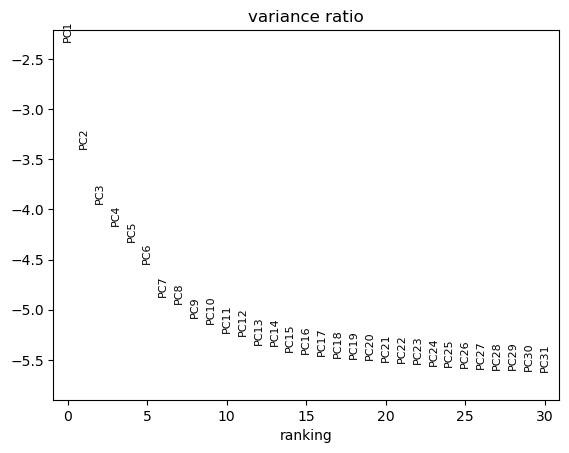

In [6]:
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata, log=True)

In [7]:
#create neighborhood graph using 20 pcs 
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=30)
##dim reduction using umap
sc.tl.umap(adata)
#Leiden clustering
#import leidenalg
#sc.tl.leiden(adata2)
##visualizing clusters
#sc.pl.umap(adata2, color=['leiden'])

2025-01-09 13:17:18.269784: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-09 13:17:18.277033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736408838.286594   36835 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736408838.289710   36835 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-09 13:17:18.300676: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

/home/zaman/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


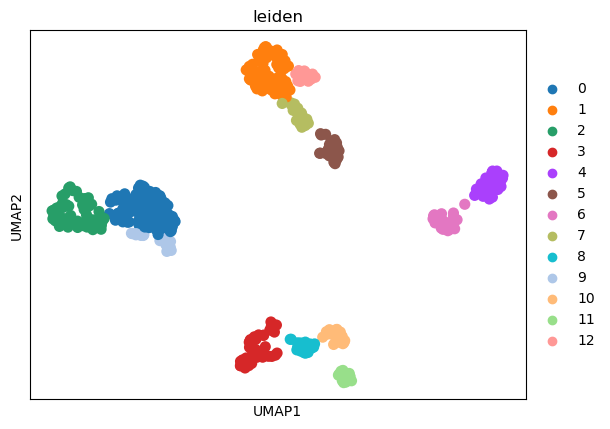

In [8]:
import leidenalg
sc.tl.leiden(adata)
##visualizing clusters
sc.pl.umap(adata, color=['leiden'])

In [9]:
adata.obs['leiden']

0       6
1      10
2      11
3      10
4      11
       ..
461     1
462     1
463     1
464     5
465     1
Name: leiden, Length: 466, dtype: category
Categories (13, object): ['0', '1', '2', '3', ..., '9', '10', '11', '12']

In [10]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil = silhouette_score(adata.X, adata.obs['leiden'],metric='euclidean')
sil

-0.022170857

In [11]:
import pandas as pd
import numpy as np
l1=np.genfromtxt('darmanis_annotation.csv',dtype=None, delimiter=",")
l2=adata.obs['leiden']

/tmp/ipykernel_36835/2406137993.py:3: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  l1=np.genfromtxt('darmanis_annotation.csv',dtype=None, delimiter=",")


In [12]:
from sklearn import metrics
ari=metrics.adjusted_rand_score(l1,l2)
ari

/home/zaman/anaconda3/lib/python3.11/site-packages/sklearn/utils/multiclass.py:348: FutureWarning: Support for labels represented as bytes is deprecated in v1.5 and will error in v1.7. Convert the labels to a string or integer format.
  warnings.warn(


0.3443647042450303